In [1]:
pip install imbalanced_learn 

Note: you may need to restart the kernel to use updated packages.


In [2]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sbn
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import os
import imblearn
from sklearn.decomposition  import PCA
from sklearn import preprocessing
from imblearn.under_sampling import CondensedNearestNeighbour

In [3]:
data = pd.read_csv("./heart.csv")

In [4]:
data.shape

(253680, 22)

In [5]:
data

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,0.0,1.0,1.0,1.0,18.0,0.0,0.0,2.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [6]:
data.corr()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
HeartDiseaseorAttack,1.000000,0.209361,0.180765,0.044206,0.052904,0.114441,0.203002,0.180272,-0.087299,-0.019790,...,0.018734,0.031000,0.258383,0.064621,0.181698,0.212709,0.086096,0.221618,-0.099600,-0.141011
HighBP,0.209361,1.000000,0.298199,0.098508,0.213748,0.096991,0.129575,0.271596,-0.125267,-0.040555,...,0.038425,0.017358,0.300530,0.056456,0.161212,0.223618,0.052207,0.344452,-0.141358,-0.171235
HighChol,0.180765,0.298199,1.000000,0.085642,0.106722,0.091299,0.092620,0.209085,-0.078046,-0.040859,...,0.042230,0.013310,0.208426,0.062069,0.121751,0.144672,0.031205,0.272318,-0.070802,-0.085459
CholCheck,0.044206,0.098508,0.085642,1.000000,0.034495,-0.009929,0.024158,0.067546,0.004190,0.023849,...,0.117626,-0.058255,0.046589,-0.008366,0.031775,0.040585,-0.022115,0.090321,0.001510,0.014259
BMI,0.052904,0.213748,0.106722,0.034495,1.000000,0.013804,0.020153,0.224379,-0.147294,-0.087518,...,-0.018471,0.058206,0.239185,0.085310,0.121141,0.197078,0.042950,-0.036618,-0.103932,-0.100069
Smoker,0.114441,0.096991,0.091299,-0.009929,0.013804,1.000000,0.061173,0.062914,-0.087401,-0.077666,...,-0.023251,0.048946,0.163143,0.092196,0.116460,0.122463,0.093662,0.120641,-0.161955,-0.123937
Stroke,0.203002,0.129575,0.092620,0.024158,0.020153,0.061173,1.000000,0.107179,-0.069151,-0.013389,...,0.008776,0.034804,0.177942,0.070172,0.148944,0.176567,0.002978,0.126974,-0.076009,-0.128599
Diabetes,0.180272,0.271596,0.209085,0.067546,0.224379,0.062914,0.107179,1.000000,-0.121947,-0.042192,...,0.015410,0.035436,0.302587,0.073507,0.176287,0.224239,0.031040,0.185026,-0.130517,-0.171483
PhysActivity,-0.087299,-0.125267,-0.078046,0.004190,-0.147294,-0.087401,-0.069151,-0.121947,1.000000,0.142756,...,0.035505,-0.061638,-0.266186,-0.125587,-0.219230,-0.253174,0.032482,-0.092511,0.199658,0.198539
Fruits,-0.019790,-0.040555,-0.040859,0.023849,-0.087518,-0.077666,-0.013389,-0.042192,0.142756,1.000000,...,0.031544,-0.044243,-0.103854,-0.068217,-0.044633,-0.048352,-0.091175,0.064547,0.110187,0.079929


In [7]:
data.describe()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.094186,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.296921,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.292087,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.698160,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [8]:
data_target = data.groupby("HeartDiseaseorAttack").size()

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([ 23893. ,  44482.4,  65071.8,  85661.2, 106250.6, 126840. ,
        147429.4, 168018.8, 188608.2, 209197.6, 229787. ]),
 <BarContainer object of 10 artists>)

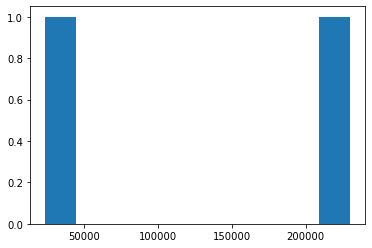

In [9]:
data_target
plt.hist(data_target)

0 --> doesn't suffer from heart diseases, 
1 --> suffer from heart diseases

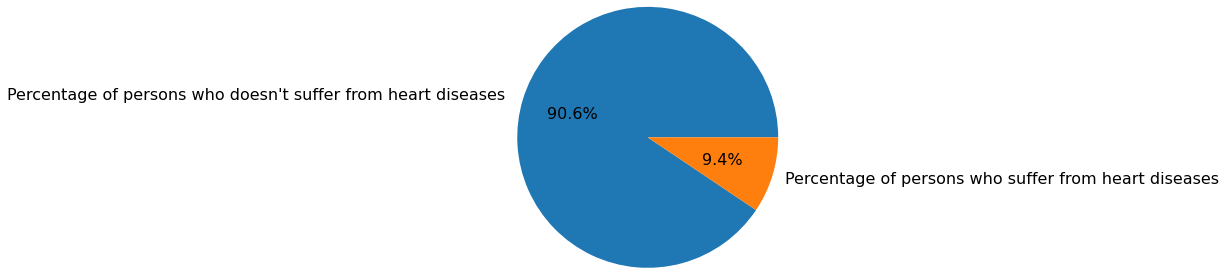

In [10]:
plt.pie(data_target.values, labels = ["Percentage of persons who doesn't suffer from heart diseases ", "Percentage of persons who suffer from heart diseases"] , autopct='%1.1f%%', radius = 1.5, textprops = {"fontsize" : 16}) 
plt.show()

In [11]:
undersample = CondensedNearestNeighbour(n_neighbors=3)

In [12]:
#data,data['HeartDiseaseorAttack']=undersample.fit_resample(X=data.iloc[:,1:],y=data['HeartDiseaseorAttack'])

In [13]:
data_sex = data.groupby(["Sex","HeartDiseaseorAttack"]).size()
print(data_sex)

Sex  HeartDiseaseorAttack
0.0  0.0                     131769
     1.0                      10205
1.0  0.0                      98018
     1.0                      13688
dtype: int64


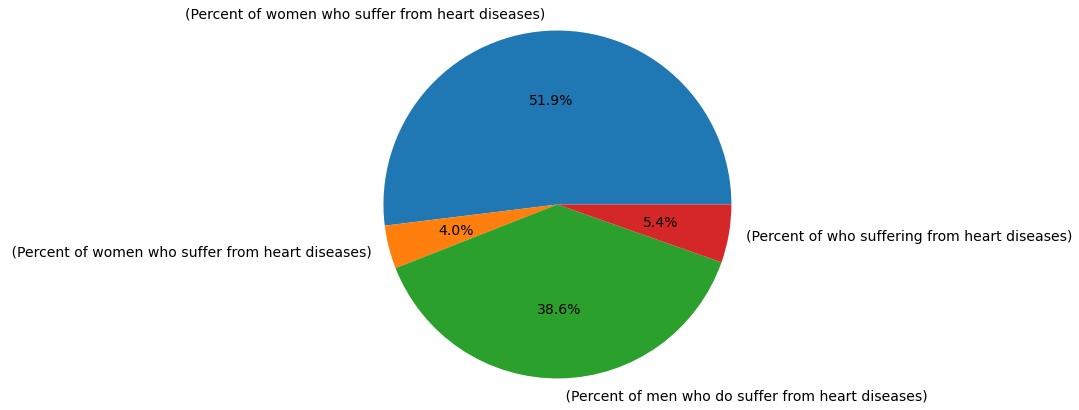

In [14]:
plt.pie(data_sex.values, labels = ["(Percent of women who suffer from heart diseases)", " (Percent of women who suffer from heart diseases)", " (Percent of men who do suffer from heart diseases)", "(Percent of who suffering from heart diseases)"],autopct='%1.1f%%',radius = 2, textprops = {"fontsize" : 14})
plt.show()

In [15]:
data_age = data.groupby(["Age", "HeartDiseaseorAttack"]).size(). head(60)

In [16]:
data_age

Age   HeartDiseaseorAttack
1.0   0.0                      5671
      1.0                        29
2.0   0.0                      7544
      1.0                        54
3.0   0.0                     10997
      1.0                       126
4.0   0.0                     13630
      1.0                       193
5.0   0.0                     15806
      1.0                       351
6.0   0.0                     19107
      1.0                       712
7.0   0.0                     24889
      1.0                      1425
8.0   0.0                     28579
      1.0                      2253
9.0   0.0                     29886
      1.0                      3358
10.0  0.0                     28001
      1.0                      4193
11.0  0.0                     19586
      1.0                      3947
12.0  0.0                     12887
      1.0                      3093
13.0  0.0                     13204
      1.0                      4159
dtype: int64

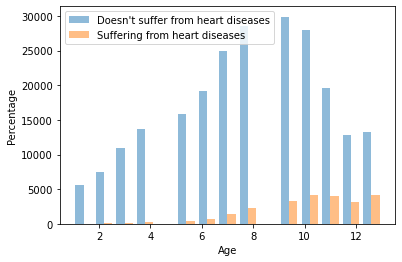

In [17]:
plt.hist([data[data.HeartDiseaseorAttack==0].Age, data[data.HeartDiseaseorAttack==1].Age], bins =15, alpha =0.5,  align='mid',histtype = "bar", orientation='vertical',  label = ["Doesn't suffer from heart diseases","Suffering from heart diseases"])
plt.xlabel("Age")
plt.ylabel("Percentage")
plt.legend()
plt.show()

In [18]:
data.isnull().sum()

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

<AxesSubplot:xlabel='Age', ylabel='CholCheck'>

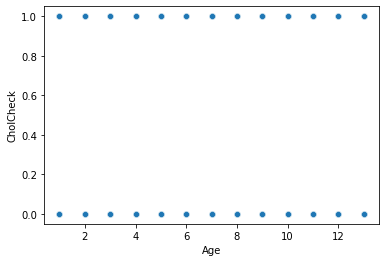

In [19]:
sbn.scatterplot(x = "Age", y = "CholCheck", data=data)

In [20]:
x = data.iloc[:,0:13]

In [21]:
y = data['HeartDiseaseorAttack']

In [ ]:
x,y=undersample.fit_resample(x,y)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state = 0)

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 8, metric = "minkowski")
knn.fit(X_train, y_train)
y_pred1 = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred1)

In [ ]:
cm

In [ ]:
accuracy_score_knn = accuracy_score(y_pred1, y_test)

In [ ]:
accuracy_score_knn

In [ ]:
from sklearn.naive_bayes import BernoulliNB
bn = BernoulliNB()
bn.fit(X_train, y_train)
y_pred2 = bn.predict(X_test)
cm = confusion_matrix(y_test, y_pred2)

In [ ]:
cm

In [ ]:
accuracy_score_bn = accuracy_score(y_pred2, y_test)

In [ ]:
accuracy_score_bn

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion = "entropy")
dtc.fit(X_train, y_train)
y_pred3 = dtc.predict(X_test)
cm = confusion_matrix(y_test, y_pred3)


In [ ]:
cm

In [ ]:
accuracy_score_dtc = accuracy_score(y_pred3, y_test)

In [ ]:
accuracy_score_dtc

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 11, criterion = "entropy")
rfc.fit(X_train, y_train)
y_pred4 = rfc.predict(X_test)
cm = confusion_matrix(y_test, y_pred4)

In [ ]:
cm

In [ ]:
accuracy_score_rfc = accuracy_score(y_pred4, y_test)

In [ ]:
accuracy_score_rfc

In [ ]:
models = [accuracy_score_knn, accuracy_score_bn, accuracy_score_dtc, accuracy_score_rfc]
accuracy_scores = []
for model in models:
    accuracy_scores.append(model)
print(accuracy_scores)    

In [ ]:
plt.bar(['KNN', 'BN', 'DTC', 'RFC'], accuracy_scores)
plt.ylim(0.6,1.0)
plt.title('Accuracy comparison for various models', fontsize=15, color='b')
plt.xlabel('Models', fontsize=15, color='g')
plt.ylabel('Accuracy Score', fontsize=15, color='m')
plt.tight_layout()
plt.show()

In [ ]:
scaled_train=preprocessing.scale(x)

In [ ]:
pca=PCA()
pca.fit(xpca_train)
pca_train=pca.transform(xpca_train)
pca_test=pca.transform(xpca_test)

per_var=np.round(pca.explained_variance_ratio_*100,decimals=1)
labels=["PC"+str(i) for i in range(1,len(per_var)+1)]
plt.bar(x=range(1,len(per_var)+1),height=per_var,tick_label=labels)
plt.ylabel("percentage of explained variance")
plt.xlabel("principal  compenent")
plt.title("scree")
plt.show()

In [ ]:
pca_df=pd.DataFrame(pca_data,columns=labels)
plt.scatter(pca_df.PC1,pca_df.PC2,pca_df.PC3,pca_df.PC4)
plt.show()

In [ ]:
loading_scores=pd.Series(pca.components_[0])
sorted_loading_scores=loading_scores.abs().sort_values(ascending=False)
top_10=sorted_loading_scores[0:10].index.values
print(sorted_loading_scores)

In [ ]:
pcset=pca_df[["PC13","PC16","PC15","PC20","PC19","PC19","PC6","PC7"]]

In [ ]:
pcset["HeartDiseaseorAttack"]=data["HeartDiseaseorAttack"]

In [ ]:
pcset.shape

In [ ]:
xpca_train, xpca_test, ypca_train, ypca_test = train_test_split(spcset,y, test_size=0.20, random_state = 0)

In [ ]:
knnpca = KNeighborsClassifier(n_neighbors = 8, metric = "minkowski")
knn.fit(xpca_train, ypca_train)
ypca_pred = knn.predict(xpca_test)
cmpca = confusion_matrix(ypca_test, ypca_pred)

In [ ]:
cmpca

In [ ]:
accuracy_score_pca= accuracy_score(ypca_pred, ypca_test)
accuracy_score_pca


In [ ]:
print(classification_report(ypca_test,ypca_pred))